In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import metrics
from sklearn.metrics import roc_auc_score, matthews_corrcoef
from os.path import join
import os
import matplotlib.pyplot as plt
import pandas as pd
import re
import statsmodels.api as sm
import seaborn as sns
import warnings
from additional_code.helper_functions import *
CURRENT_DIR = os.getcwd()
print(CURRENT_DIR)

import warnings
warnings.filterwarnings("ignore")

/Users/vahidatabaigi/SIP/ESP_HardSplits/notebooks_and_code


# Data Leakage in ESP model

In [ ]:
plot_top_keys_values_multiple_df(
    dfs=[train_ESP,test_ESP], 
    df_names=[ 'train_ESP','Test_ESP'],
    key_column='molecule ID', 
    xlabel='Frequency', 
    ylabel='molecule ID', 
    title='Top {top_count} frequent molecules ids in {df_name} set', 
    top_count=100,
    title_fontsize=12 )

In [ ]:
plot_top_keys_values_multiple_df(
    dfs=[train_ESP,test_ESP], 
    df_names=[ 'train_ESP','Test_ESP'],
    key_column='Uniprot ID', 
    xlabel='Frequency', 
    ylabel='Uniprot ID', 
    title='Top {top_count} frequent molecules ids in {df_name} set', 
    top_count=100,
    title_fontsize=12 )

# 2 Splits

### ROC-AUC score for 1D split

In [27]:
y_test_pred_esm1b_ts_ecfp_ESP_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_ECFP_ESP_2S.npy"))
test_y_esm1b_ts_ecfp_ESP_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_ECFP_ESP_2S.npy"))
y_test_pred_esm1b_ts_gnn_ESP_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_PreGNN_ESP_2S.npy"))
test_y_esm1b_ts_gnn_ESP_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_PreGNN_ESP_2S.npy"))
y_test_pred_esm1b_ts_ecfp_C1e_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_ECFP_C1e_2S.npy"))
test_y_esm1b_ts_ecfp_C1e_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_ECFP_C1e_2S.npy"))
y_test_pred_esm1b_ts_gnn_C1e_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_PreGNN_C1e_2S.npy"))
test_y_esm1b_ts_gnn_C1e_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_PreGNN_C1e_2S.npy"))
y_test_pred_esm1b_ts_ecfp_C1f_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_ECFP_C1f_2S.npy"))
test_y_esm1b_ts_ecfp_C1f_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_ECFP_C1f_2S.npy"))
y_test_pred_esm1b_ts_gnn_C1f_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_PreGNN_C1f_2S.npy"))
test_y_esm1b_ts_gnn_C1f_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_PreGNN_C1f_2S.npy"))
y_test_pred_esm1b_ts_ecfp_I1e_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_ECFP_I1e_2S.npy"))
test_y_esm1b_ts_ecfp_I1e_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_ECFP_I1e_2S.npy"))
y_test_pred_esm1b_ts_gnn_I1e_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_PreGNN_I1e_2S.npy"))
test_y_esm1b_ts_gnn_I1e_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_PreGNN_I1e_2S.npy"))
y_test_pred_esm1b_ts_ecfp_I1f_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_ECFP_I1f_2S.npy"))
test_y_esm1b_ts_ecfp_I1f_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_ECFP_I1f_2S.npy"))
y_test_pred_esm1b_ts_gnn_I1f_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_PreGNN_I1f_2S.npy"))
test_y_esm1b_ts_gnn_I1f_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_PreGNN_I1f_2S.npy"))

In [28]:
fpr_esm1b_ts_ecfp_ESP_2S, tpr_esm1b_ts_ecfp_ESP_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_ESP_2S, y_test_pred_esm1b_ts_ecfp_ESP_2S)
roc_auc_esm1b_ts_ecfp_ESP_2S = metrics.auc(fpr_esm1b_ts_ecfp_ESP_2S, tpr_esm1b_ts_ecfp_ESP_2S)
fpr_esm1b_ts_gnn_ESP_2S, tpr_esm1b_ts_gnn_ESP_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_ESP_2S, y_test_pred_esm1b_ts_gnn_ESP_2S)
roc_auc_esm1b_ts_gnn_ESP_2S = metrics.auc(fpr_esm1b_ts_gnn_ESP_2S, tpr_esm1b_ts_gnn_ESP_2S)

fpr_esm1b_ts_ecfp_C1e_2S, tpr_esm1b_ts_ecfp_C1e_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_C1e_2S, y_test_pred_esm1b_ts_ecfp_C1e_2S)
roc_auc_esm1b_ts_ecfp_C1e_2S = metrics.auc(fpr_esm1b_ts_ecfp_C1e_2S, tpr_esm1b_ts_ecfp_C1e_2S)
fpr_esm1b_ts_gnn_C1e_2S, tpr_esm1b_ts_gnn_C1e_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_C1e_2S, y_test_pred_esm1b_ts_gnn_C1e_2S)
roc_auc_esm1b_ts_gnn_C1e_2S = metrics.auc(fpr_esm1b_ts_gnn_C1e_2S, tpr_esm1b_ts_gnn_C1e_2S)


fpr_esm1b_ts_ecfp_C1f_2S, tpr_esm1b_ts_ecfp_C1f_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_C1f_2S, y_test_pred_esm1b_ts_ecfp_C1f_2S)
roc_auc_esm1b_ts_ecfp_C1f_2S = metrics.auc(fpr_esm1b_ts_ecfp_C1f_2S, tpr_esm1b_ts_ecfp_C1f_2S)
fpr_esm1b_ts_gnn_C1f_2S, tpr_esm1b_ts_gnn_C1f_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_C1f_2S, y_test_pred_esm1b_ts_gnn_C1f_2S)
roc_auc_esm1b_ts_gnn_C1f_2S = metrics.auc(fpr_esm1b_ts_gnn_C1f_2S, tpr_esm1b_ts_gnn_C1f_2S)


fpr_esm1b_ts_ecfp_I1e_2S, tpr_esm1b_ts_ecfp_I1e_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_I1e_2S, y_test_pred_esm1b_ts_ecfp_I1e_2S)
roc_auc_esm1b_ts_ecfp_I1e_2S = metrics.auc(fpr_esm1b_ts_ecfp_I1e_2S, tpr_esm1b_ts_ecfp_I1e_2S)
fpr_esm1b_ts_gnn_I1e_2S, tpr_esm1b_ts_gnn_I1e_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_I1e_2S, y_test_pred_esm1b_ts_gnn_I1e_2S)
roc_auc_esm1b_ts_gnn_I1e_2S = metrics.auc(fpr_esm1b_ts_gnn_I1e_2S, tpr_esm1b_ts_gnn_I1e_2S)

fpr_esm1b_ts_ecfp_I1f_2S, tpr_esm1b_ts_ecfp_I1f_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_I1f_2S, y_test_pred_esm1b_ts_ecfp_I1f_2S)
roc_auc_esm1b_ts_ecfp_I1f_2S = metrics.auc(fpr_esm1b_ts_ecfp_I1f_2S, tpr_esm1b_ts_ecfp_I1f_2S)
fpr_esm1b_ts_gnn_I1f_2S, tpr_esm1b_ts_gnn_I1f_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_I1f_2S, y_test_pred_esm1b_ts_gnn_I1f_2S)
roc_auc_esm1b_ts_gnn_I1f_2S = metrics.auc(fpr_esm1b_ts_gnn_I1f_2S, tpr_esm1b_ts_gnn_I1f_2S)

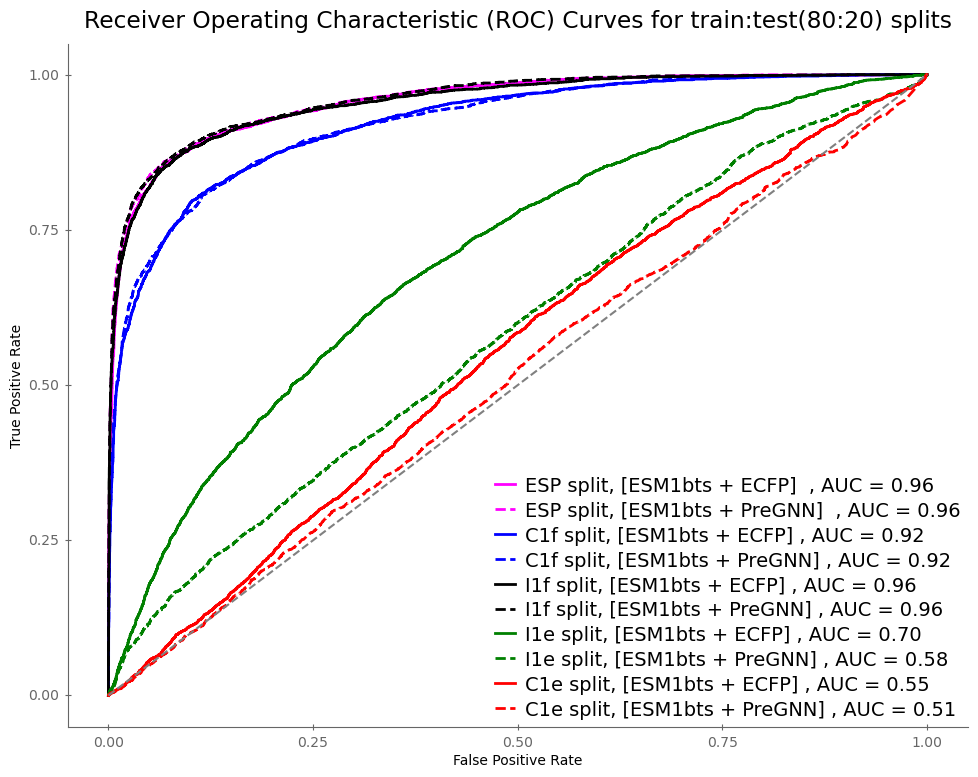

In [29]:
def plot_roc_curve(fpr, tpr, roc_auc, label, linestyle='solid', color='blue'):
    plt.plot(fpr, tpr, color=color, label=f'{label} , AUC = {roc_auc:.2f}', linewidth=2.0, linestyle=linestyle)

fig, ax = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 14}) 

# Define your data and labels here
data = [
    (fpr_esm1b_ts_ecfp_ESP_2S, tpr_esm1b_ts_ecfp_ESP_2S, roc_auc_esm1b_ts_ecfp_ESP_2S, 'ESP split, [ESM1bts + ECFP] ', 'solid', 'magenta'),
    (fpr_esm1b_ts_gnn_ESP_2S, tpr_esm1b_ts_gnn_ESP_2S, roc_auc_esm1b_ts_gnn_ESP_2S, 'ESP split, [ESM1bts + PreGNN] ', 'dashed', 'magenta'),
    (fpr_esm1b_ts_ecfp_C1f_2S, tpr_esm1b_ts_ecfp_C1f_2S, roc_auc_esm1b_ts_ecfp_C1f_2S, 'C1f split, [ESM1bts + ECFP]', 'solid', 'blue'),
    (fpr_esm1b_ts_gnn_C1f_2S, tpr_esm1b_ts_gnn_C1f_2S, roc_auc_esm1b_ts_gnn_C1f_2S, 'C1f split, [ESM1bts + PreGNN]', 'dashed', 'blue'),
    (fpr_esm1b_ts_ecfp_I1f_2S, tpr_esm1b_ts_ecfp_I1f_2S, roc_auc_esm1b_ts_ecfp_I1f_2S, 'I1f split, [ESM1bts + ECFP]', 'solid', 'black'),
    (fpr_esm1b_ts_gnn_I1f_2S, tpr_esm1b_ts_gnn_I1f_2S, roc_auc_esm1b_ts_gnn_I1f_2S, 'I1f split, [ESM1bts + PreGNN]', 'dashed', 'black'),
    (fpr_esm1b_ts_ecfp_I1e_2S, tpr_esm1b_ts_ecfp_I1e_2S, roc_auc_esm1b_ts_ecfp_I1e_2S, 'I1e split, [ESM1bts + ECFP]', 'solid', 'green'),
    (fpr_esm1b_ts_gnn_I1e_2S, tpr_esm1b_ts_gnn_I1e_2S, roc_auc_esm1b_ts_gnn_I1e_2S, 'I1e split, [ESM1bts + PreGNN]', 'dashed', 'green'),
    (fpr_esm1b_ts_ecfp_C1e_2S, tpr_esm1b_ts_ecfp_C1e_2S, roc_auc_esm1b_ts_ecfp_C1e_2S, 'C1e split, [ESM1bts + ECFP]', 'solid', 'red'),
    (fpr_esm1b_ts_gnn_C1e_2S, tpr_esm1b_ts_gnn_C1e_2S, roc_auc_esm1b_ts_gnn_C1e_2S, 'C1e split, [ESM1bts + PreGNN]', 'dashed', 'red'),
]

# Plot each ROC curve
for fpr, tpr, roc_auc, label, linestyle, color in data:
    plot_roc_curve(fpr, tpr, roc_auc, label, linestyle, color)

# Set axis parameters
ax.locator_params(axis="y", nbins=5)
ax.locator_params(axis="x", nbins=5)

# Set legend
plt.legend(loc='lower right', fontsize=14)
plt.plot([0, 1], [0, 1], '--', color='gray', linewidth=1.5) 
plt.xlim([-0.05, 1.05]) 
plt.ylim([-0.05, 1.05])  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for train:test(80:20) splits')
#plt.grid(True, linestyle='--', alpha=0.7) 
plt.tight_layout() 
plt.show()


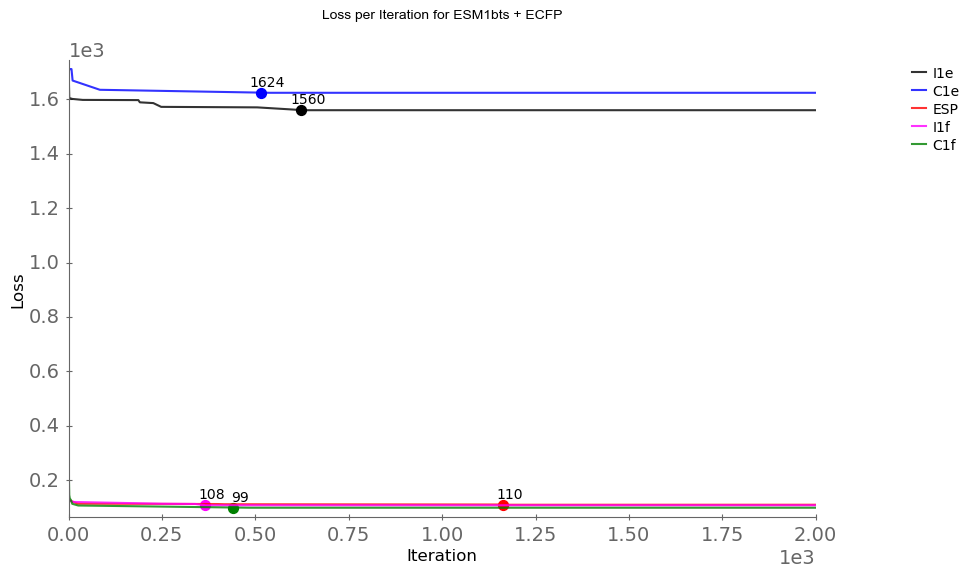

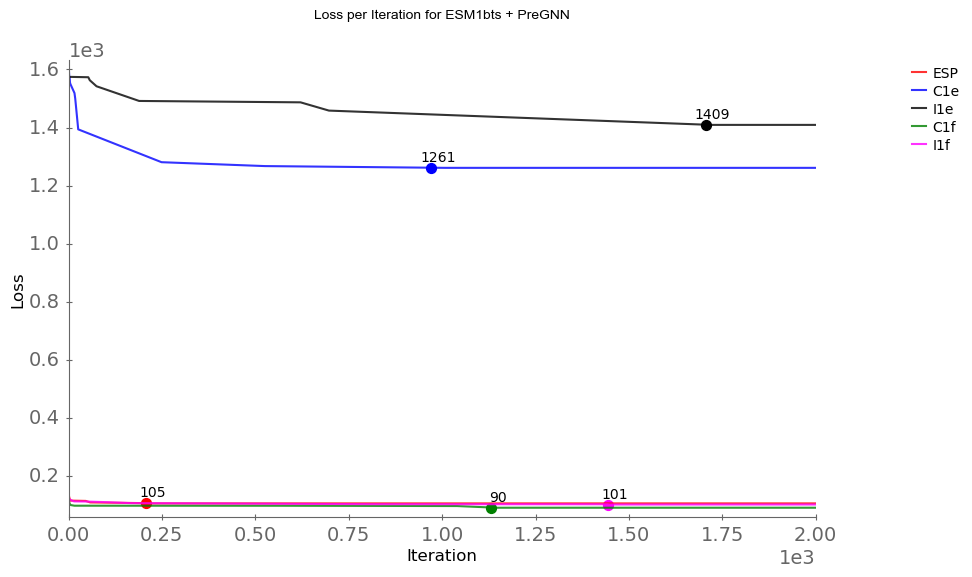

In [30]:
log_directory = '/Users/vahidatabaigi/SIP/ESP_HardSplits/data/Reports/hyperOp_report'
log_files = [f for f in os.listdir(log_directory) if f.endswith('.log')]

color_map = {'ESP': 'red', 'C1e': 'blue', 'C1f': 'green', 'I1e': 'black', 'I1f': 'magenta'}

plotting_loss("ECFP", experiment="1D", log_directory=log_directory, color_map=color_map, split_number=2)
plotting_loss("PreGNN", experiment="1D", log_directory=log_directory, color_map=color_map, split_number=2)

### ROC-AUC score for 2D split

In [31]:
y_test_pred_esm1b_ts_gnn_C2_2S =  np.load(join(CURRENT_DIR, ".." ,"data","training_results_2S","y_test_pred_xgboost_ESM1b_ts_PreGNN_C2_2S.npy"))
test_y_esm1b_ts_gnn_C2_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S",  "y_test_true_xgboost_ESM1b_ts_PreGNN_C2_2S.npy"))
y_test_pred_esm1b_ts_gnn_ESPC2_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S","y_test_pred_xgboost_ESM1b_ts_PreGNN_ESPC2_2S.npy"))
test_y_esm1b_ts_gnn_ESPC2_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_PreGNN_ESPC2_2S.npy"))

In [32]:
y_test_pred_esm1b_ts_ecfp_C2_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_ECFP_C2_2S.npy"))
test_y_esm1b_ts_ecfp_C2_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_ECFP_C2_2S.npy"))
y_test_pred_esm1b_ts_ecfp_ESPC2_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_ECFP_ESPC2_2S.npy"))
test_y_esm1b_ts_ecfp_ESPC2_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_ECFP_ESPC2_2S.npy"))

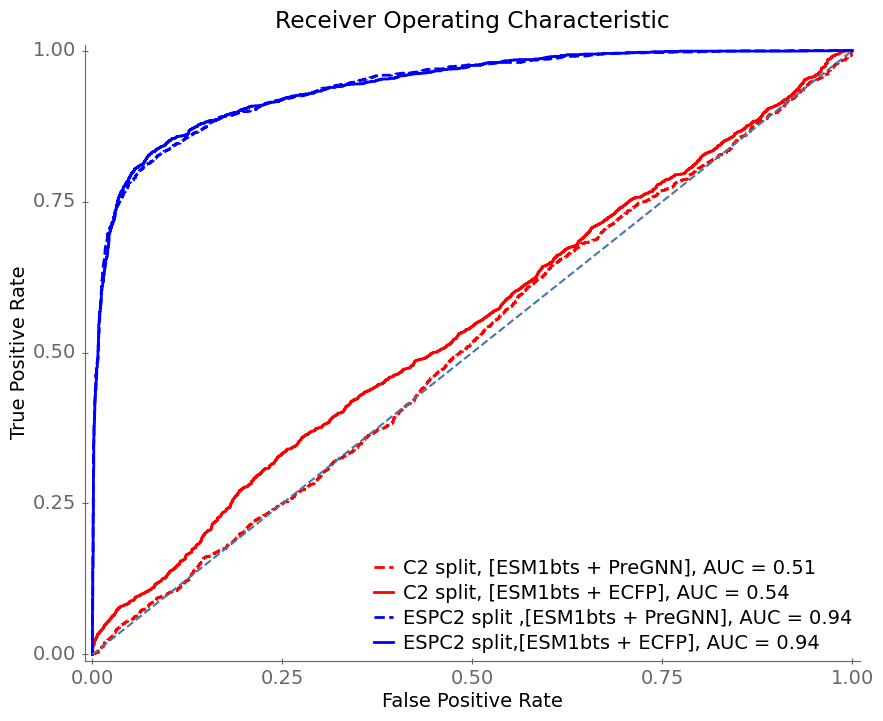

In [33]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 14})

fpr_esm1b_ts_ecfp_C2_2S, tpr_esm1b_ts_ecfp_C2_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_C2_2S, y_test_pred_esm1b_ts_ecfp_C2_2S)
roc_auc_esm1b_ts_ecfp_C2_2S = metrics.auc(fpr_esm1b_ts_ecfp_C2_2S, tpr_esm1b_ts_ecfp_C2_2S)
fpr_esm1b_ts_ecfp_ESPC2_2S, tpr_esm1b_ts_ecfp_ESPC2_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_ESPC2_2S, y_test_pred_esm1b_ts_ecfp_ESPC2_2S)
roc_auc_esm1b_ts_ecfp_ESPC2_2S = metrics.auc(fpr_esm1b_ts_ecfp_ESPC2_2S, tpr_esm1b_ts_ecfp_ESPC2_2S)

fpr_esm1b_ts_gnn_C2_2S, tpr_esm1b_ts_gnn_C2_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_C2_2S, y_test_pred_esm1b_ts_gnn_C2_2S)
roc_auc_esm1b_ts_gnn_C2_2S = metrics.auc(fpr_esm1b_ts_gnn_C2_2S, tpr_esm1b_ts_gnn_C2_2S)
fpr_esm1b_ts_gnn_ESPC2_2S, tpr_esm1b_ts_gnn_ESPC2_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_ESPC2_2S, y_test_pred_esm1b_ts_gnn_ESPC2_2S)
roc_auc_esm1b_ts_gnn_ESPC2_2S = metrics.auc(fpr_esm1b_ts_gnn_ESPC2_2S, tpr_esm1b_ts_gnn_ESPC2_2S)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_esm1b_ts_gnn_C2_2S, tpr_esm1b_ts_gnn_C2_2S, 'red', label='C2 split, [ESM1bts + PreGNN], AUC = %0.2f' % roc_auc_esm1b_ts_gnn_C2_2S, linewidth=2.0, linestyle='dashed')
plt.plot(fpr_esm1b_ts_ecfp_C2_2S, tpr_esm1b_ts_ecfp_C2_2S, 'red', label='C2 split, [ESM1bts + ECFP], AUC = %0.2f' % roc_auc_esm1b_ts_ecfp_C2_2S, linewidth=2.0)
plt.plot(fpr_esm1b_ts_gnn_ESPC2_2S, tpr_esm1b_ts_gnn_ESPC2_2S, 'blue', label='ESPC2 split ,[ESM1bts + PreGNN], AUC = %0.2f' % roc_auc_esm1b_ts_gnn_ESPC2_2S, linewidth=2.0, linestyle='dashed')
plt.plot(fpr_esm1b_ts_ecfp_ESPC2_2S, tpr_esm1b_ts_ecfp_ESPC2_2S, 'blue', label='ESPC2 split,[ESM1bts + ECFP], AUC = %0.2f' % roc_auc_esm1b_ts_ecfp_ESPC2_2S, linewidth=2.0)


ax.locator_params(axis="y", nbins=5)
ax.locator_params(axis="x", nbins=5)

plt.legend(loc='lower right', fontsize=14)
plt.plot([0, 1], [0, 1], '--')
eps = 0.01
plt.xlim([0 - eps, 1 + eps])
plt.ylim([0 - eps, 1 + eps])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("/Users/vahidatabaigi/Desktop/Thesis/thesis-template/Figures/AUCC2.png", dpi=600, bbox_inches='tight')
plt.show()


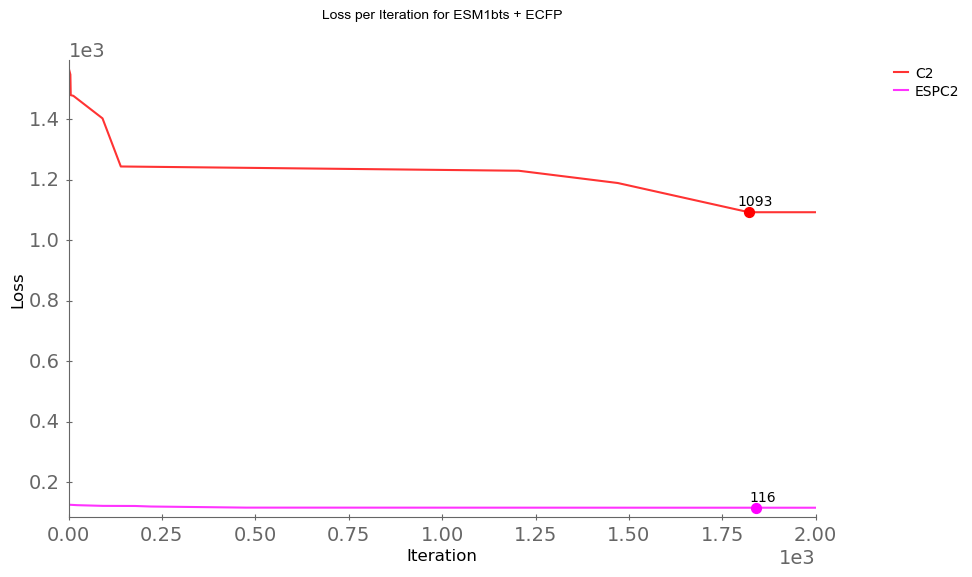

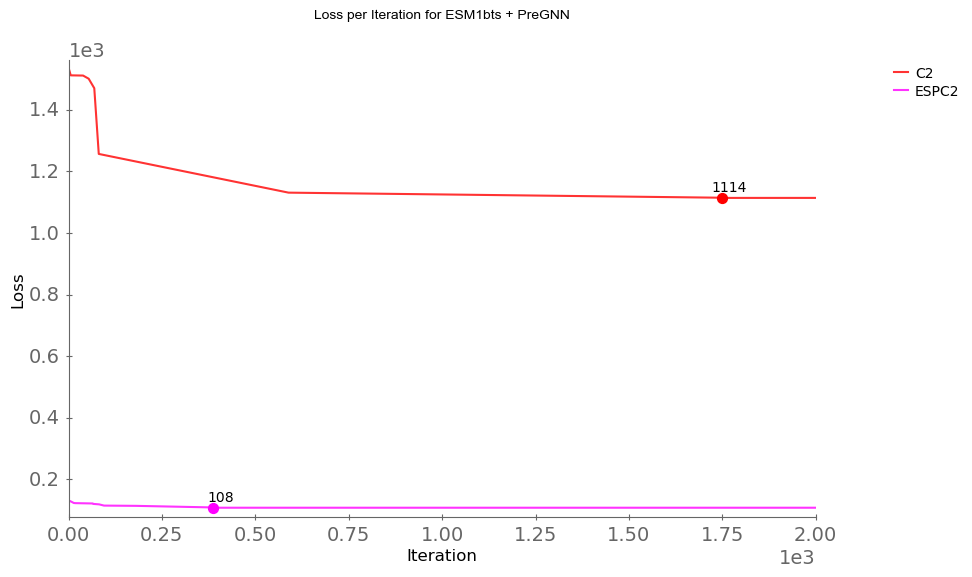

In [34]:
log_directory = '/Users/vahidatabaigi/SIP/ESP_HardSplits/data/Reports/hyperOp_report'
log_files = [f for f in os.listdir(log_directory) if f.endswith('.log')]

color_map = {'ESPC2': 'magenta', 'C2': 'red'}

plotting_loss("ECFP", experiment="2D", log_directory=log_directory, color_map=color_map, split_number=2)
plotting_loss("PreGNN", experiment="2D", log_directory=log_directory, color_map=color_map, split_number=2)

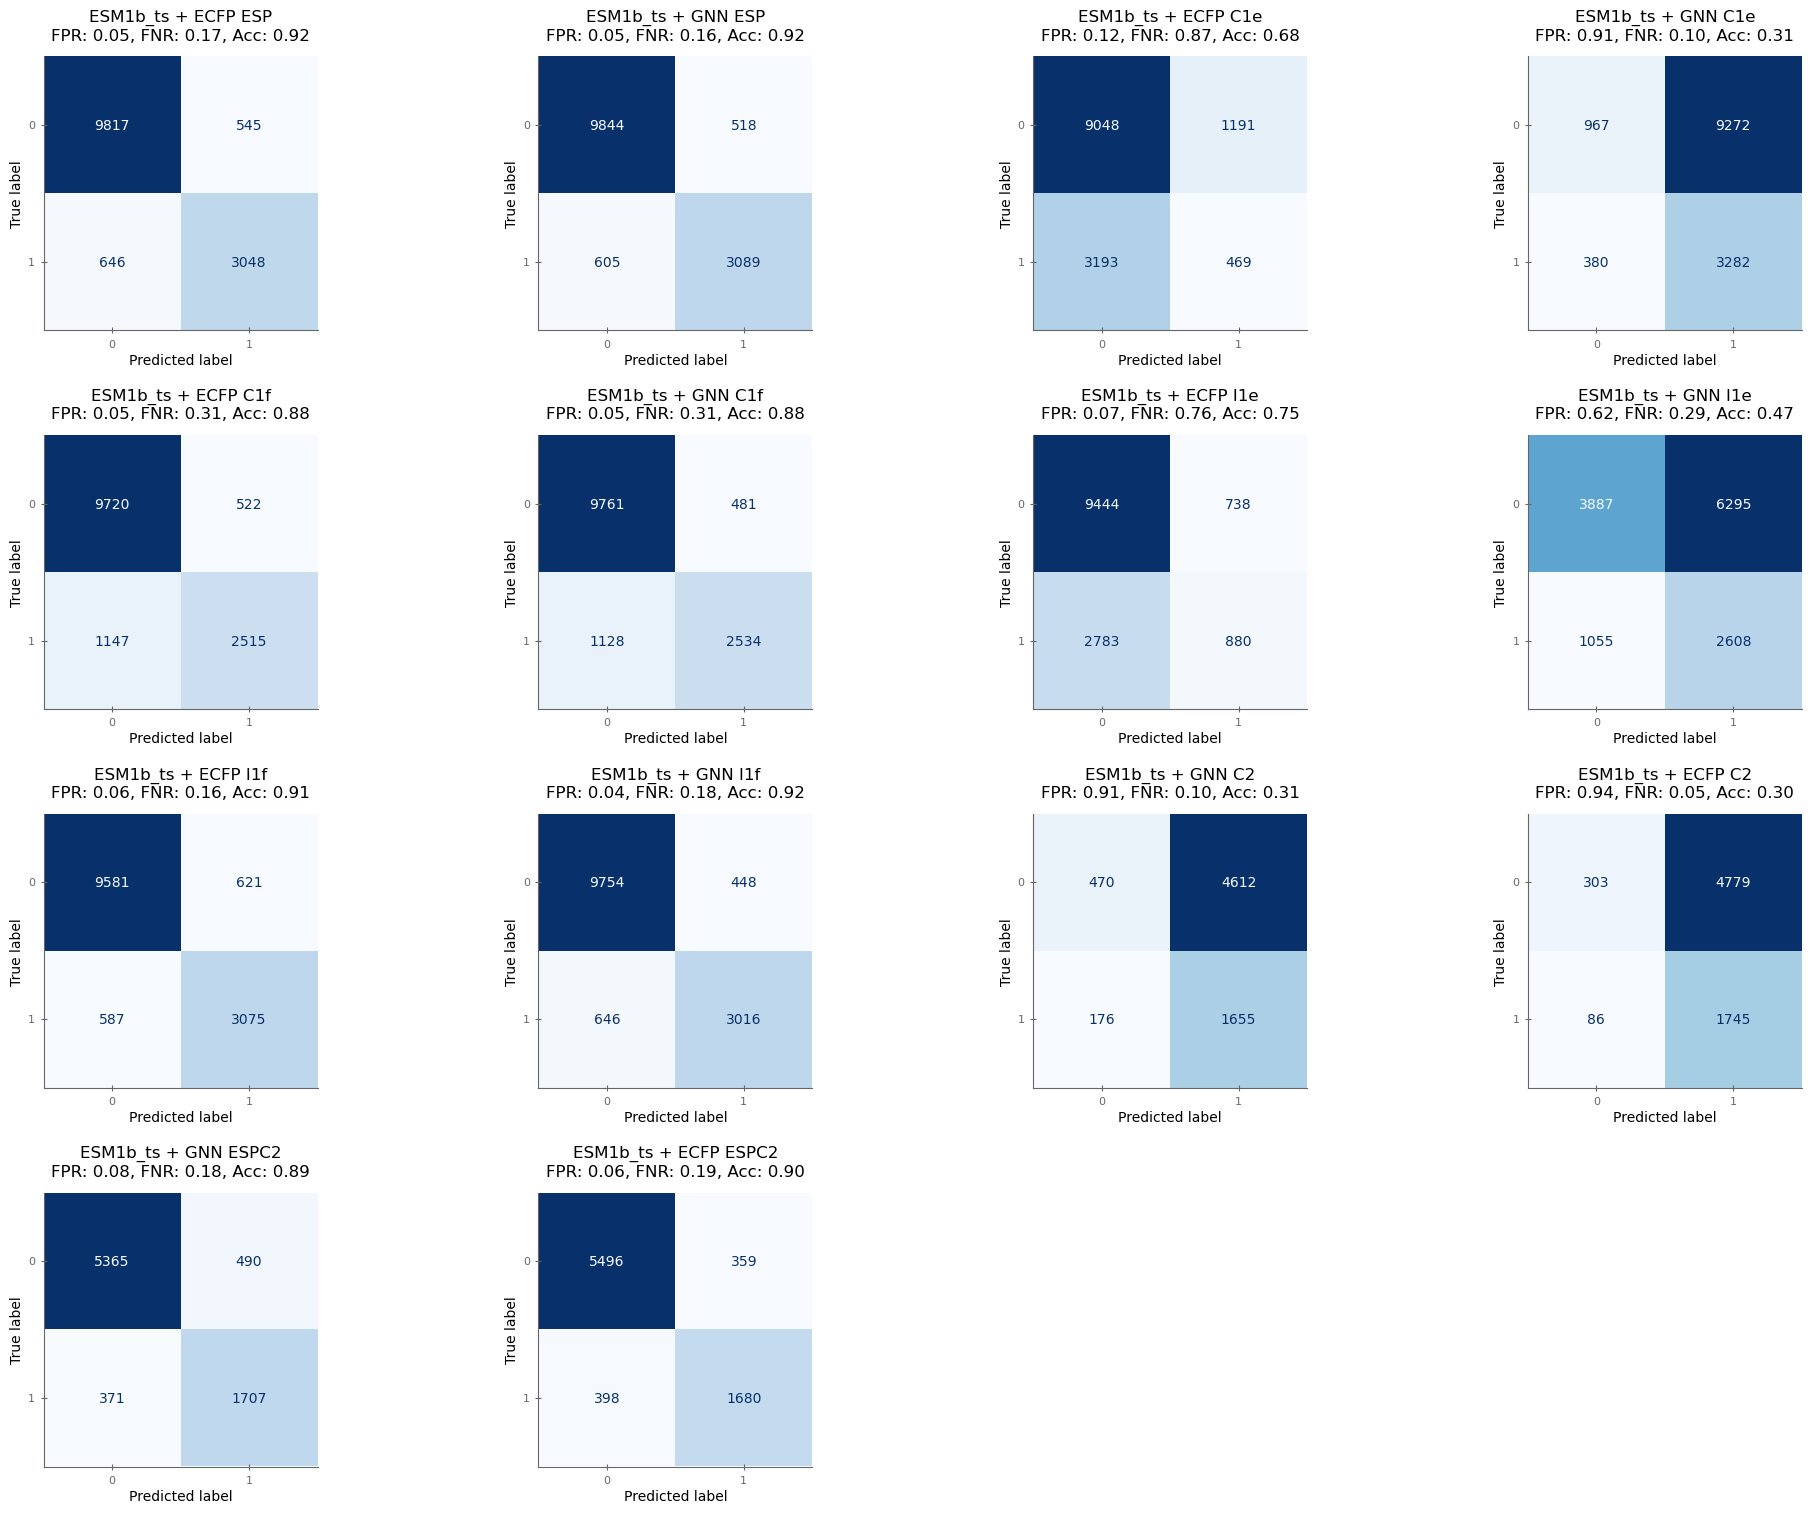

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def calculate_fpr_fnr_accuracy(y_true, y_pred):
    y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]
    cm = confusion_matrix(y_true, y_pred_binary)
    TN, FP, FN, TP = cm.ravel()
    fpr = FP / (FP + TN)
    fnr = FN / (FN + TP)
    accuracy = (TP + TN) / (TP + FP + FN + TN)
    return fpr, fnr, accuracy, cm

datasets = [
    ('ECFP ESP', test_y_esm1b_ts_ecfp_ESP_2S, y_test_pred_esm1b_ts_ecfp_ESP_2S),
    ('GNN ESP', test_y_esm1b_ts_gnn_ESP_2S, y_test_pred_esm1b_ts_gnn_ESP_2S),
    ('ECFP C1e', test_y_esm1b_ts_ecfp_C1e_2S, y_test_pred_esm1b_ts_ecfp_C1e_2S),
    ('GNN C1e', test_y_esm1b_ts_gnn_C1e_2S, y_test_pred_esm1b_ts_gnn_C1e_2S),
    ('ECFP C1f', test_y_esm1b_ts_ecfp_C1f_2S, y_test_pred_esm1b_ts_ecfp_C1f_2S),
    ('GNN C1f', test_y_esm1b_ts_gnn_C1f_2S, y_test_pred_esm1b_ts_gnn_C1f_2S),
    ('ECFP I1e', test_y_esm1b_ts_ecfp_I1e_2S, y_test_pred_esm1b_ts_ecfp_I1e_2S),
    ('GNN I1e', test_y_esm1b_ts_gnn_I1e_2S, y_test_pred_esm1b_ts_gnn_I1e_2S),
    ('ECFP I1f', test_y_esm1b_ts_ecfp_I1f_2S, y_test_pred_esm1b_ts_ecfp_I1f_2S),
    ('GNN I1f', test_y_esm1b_ts_gnn_I1f_2S, y_test_pred_esm1b_ts_gnn_I1f_2S),
    ('GNN C2', test_y_esm1b_ts_gnn_C2_2S, y_test_pred_esm1b_ts_gnn_C2_2S),
    ('ECFP C2', test_y_esm1b_ts_ecfp_C2_2S, y_test_pred_esm1b_ts_ecfp_C2_2S),
    ('GNN ESPC2', test_y_esm1b_ts_gnn_ESPC2_2S, y_test_pred_esm1b_ts_gnn_ESPC2_2S),
    ('ECFP ESPC2', test_y_esm1b_ts_ecfp_ESPC2_2S, y_test_pred_esm1b_ts_ecfp_ESPC2_2S)
]

n_rows = 4
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 16))

for i, (name, y_true, y_pred) in enumerate(datasets):
    fpr, fnr, accuracy, cm = calculate_fpr_fnr_accuracy(y_true, y_pred)
    row, col = divmod(i, n_cols)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[row, col], cmap='Blues', colorbar=False)
    axes[row, col].set_title(f"ESM1b_ts + {name}\nFPR: {fpr:.2f}, FNR: {fnr:.2f}, Acc: {accuracy:.2f}", fontsize=12)
    for text in axes[row, col].texts:
        text.set_fontsize(10)
        
    axes[row, col].tick_params(axis='both', which='major', labelsize=8)
    axes[row, col].set_xlabel(axes[row, col].get_xlabel(), fontsize=10)
    axes[row, col].set_ylabel(axes[row, col].get_ylabel(), fontsize=10)

for j in range(len(datasets), n_rows * n_cols):
    fig.delaxes(axes.flat[j])
plt.subplots_adjust(hspace=0.9, wspace=0.1)
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save the figure before displaying it
plt.savefig('confusion_matrices_with_accuracy.png', dpi=600, bbox_inches='tight')
plt.show()


### ROC-AUC score for 1D split and NoATP

In [26]:
y_test_pred_esm1b_ts_ecfp_ESP_D3408_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_ECFP_ESP_D3408_2S.npy"))
test_y_esm1b_ts_ecfp_ESP_D3408_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_ECFP_ESP_D3408_2S.npy"))
y_test_pred_esm1b_ts_gnn_ESP_D3408_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_PreGNN_ESP_D3408_2S.npy"))
test_y_esm1b_ts_gnn_ESP_D3408_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_PreGNN_ESP_D3408_2S.npy"))

y_test_pred_esm1b_ts_ecfp_ESP_NoATP_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_ECFP_ESP_NOATP_2S.npy"))
test_y_esm1b_ts_ecfp_ESP_NoATP_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_ECFP_ESP_NOATP_2S.npy"))
y_test_pred_esm1b_ts_gnn_ESP_NoATP_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_PreGNN_ESP_NOATP_2S.npy"))
test_y_esm1b_ts_gnn_ESP_NoATP_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_PreGNN_ESP_NOATP_2S.npy"))



In [27]:

fpr_esm1b_ts_ecfp_ESP_D3408_2S, tpr_esm1b_ts_ecfp_ESP_D3408_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_ESP_D3408_2S, y_test_pred_esm1b_ts_ecfp_ESP_D3408_2S)
roc_auc_esm1b_ts_ecfp_ESP_D3408_2S = metrics.auc(fpr_esm1b_ts_ecfp_ESP_D3408_2S, tpr_esm1b_ts_ecfp_ESP_D3408_2S)
fpr_esm1b_ts_gnn_ESP_D3408_2S, tpr_esm1b_ts_gnn_ESP_D3408_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_ESP_D3408_2S, y_test_pred_esm1b_ts_gnn_ESP_D3408_2S)
roc_auc_esm1b_ts_gnn_ESP_D3408_2S = metrics.auc(fpr_esm1b_ts_gnn_ESP_D3408_2S, tpr_esm1b_ts_gnn_ESP_D3408_2S)

fpr_esm1b_ts_ecfp_ESP_NoATP_2S, tpr_esm1b_ts_ecfp_ESP_NoATP_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_ESP_NoATP_2S, y_test_pred_esm1b_ts_ecfp_ESP_NoATP_2S)
roc_auc_esm1b_ts_ecfp_ESP_NoATP_2S = metrics.auc(fpr_esm1b_ts_ecfp_ESP_NoATP_2S, tpr_esm1b_ts_ecfp_ESP_NoATP_2S)
fpr_esm1b_ts_gnn_ESP_NoATP_2S, tpr_esm1b_ts_gnn_ESP_NoATP_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_ESP_NoATP_2S, y_test_pred_esm1b_ts_gnn_ESP_NoATP_2S)
roc_auc_esm1b_ts_gnn_ESP_NoATP_2S = metrics.auc(fpr_esm1b_ts_gnn_ESP_NoATP_2S, tpr_esm1b_ts_gnn_ESP_NoATP_2S)


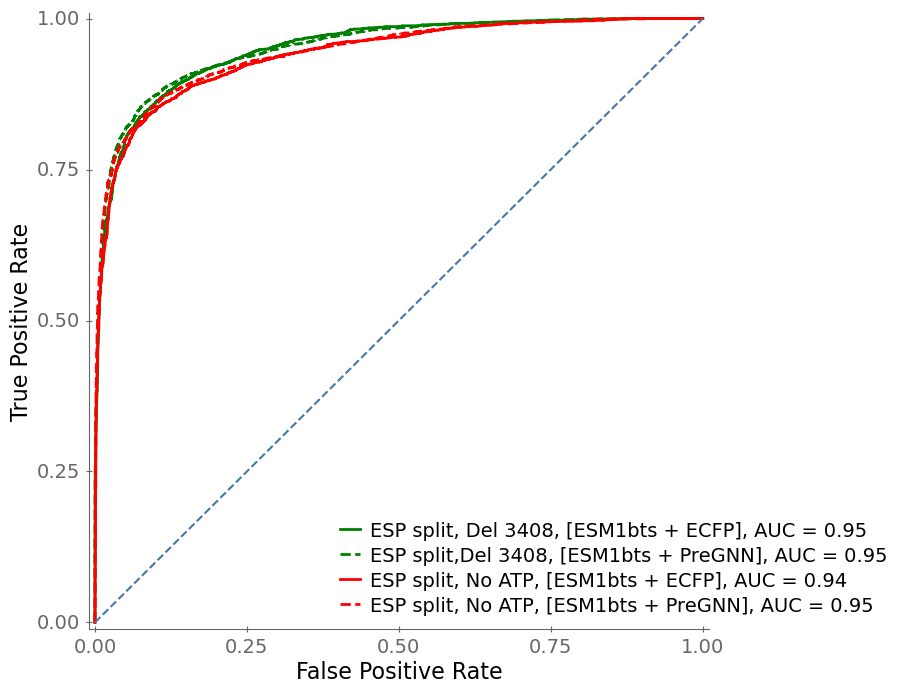

In [28]:
def plot_roc_curve(fpr, tpr, roc_auc, label, linestyle='solid', color='blue'):
    plt.plot(fpr, tpr, color=color, label=f'{label}, AUC = {roc_auc:.2f}', linewidth=2.0, linestyle=linestyle)

fig, ax = plt.subplots(figsize=(8, 8))
plt.rcParams.update({'font.size': 20})

# Define your data and labels here
data = [
    
    (fpr_esm1b_ts_ecfp_ESP_D3408_2S, tpr_esm1b_ts_ecfp_ESP_D3408_2S, roc_auc_esm1b_ts_ecfp_ESP_D3408_2S, 'ESP split, Del 3408, [ESM1bts + ECFP]', 'solid', 'green'),
    (fpr_esm1b_ts_gnn_ESP_D3408_2S, tpr_esm1b_ts_gnn_ESP_D3408_2S, roc_auc_esm1b_ts_gnn_ESP_D3408_2S, 'ESP split,Del 3408, [ESM1bts + PreGNN]', 'dashed', 'green'),
    
    (fpr_esm1b_ts_ecfp_ESP_NoATP_2S, tpr_esm1b_ts_ecfp_ESP_NoATP_2S, roc_auc_esm1b_ts_ecfp_ESP_NoATP_2S, 'ESP split, No ATP, [ESM1bts + ECFP]', 'solid', 'red'),
    (fpr_esm1b_ts_gnn_ESP_NoATP_2S, tpr_esm1b_ts_gnn_ESP_NoATP_2S, roc_auc_esm1b_ts_gnn_ESP_NoATP_2S, 'ESP split, No ATP, [ESM1bts + PreGNN]', 'dashed', 'red'),

]
# Plot each ROC curve
for fpr, tpr, roc_auc, label, linestyle, color in data:
    plot_roc_curve(fpr, tpr, roc_auc, label, linestyle, color)

# Set axis parameters
ax.locator_params(axis="y", nbins=5)
ax.locator_params(axis="x", nbins=5)

# Set legend
plt.legend(loc='lower right', bbox_to_anchor=(1.30, 0.01), fontsize=14)
plt.plot([0, 1], [0, 1], '--')
eps = 0.01
plt.xlim([0 - eps, 1 + eps])
plt.ylim([0 - eps, 1 + eps])
plt.ylabel('True Positive Rate',fontsize=16)
plt.xlabel('False Positive Rate',fontsize=16)
plt.show()


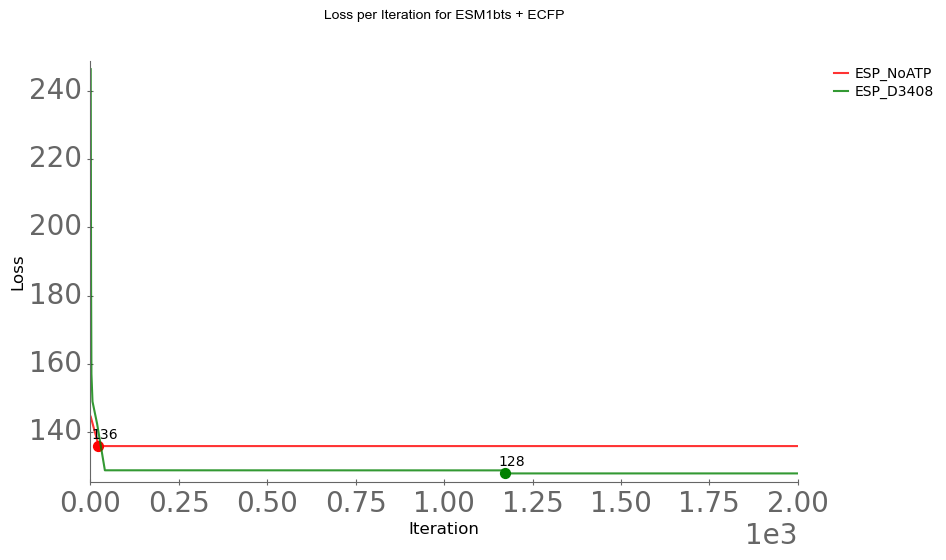

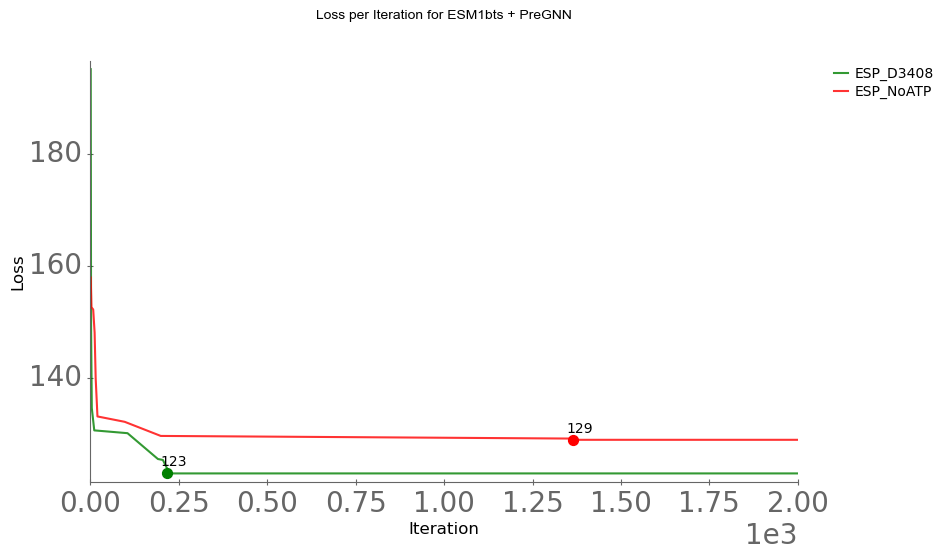

In [29]:
log_directory = '/Users/vahidatabaigi/SIP/ESP_HardSplits/data/Reports/hyperOp_report'
log_files = [f for f in os.listdir(log_directory) if f.endswith('.log')]

color_map = {'ESP_NoATP': 'red', 'ESP_D3408': 'green'}

plotting_loss("ECFP", experiment="NoATP", log_directory=log_directory, color_map=color_map, split_number=2)
plotting_loss("PreGNN", experiment="NoATP", log_directory=log_directory, color_map=color_map, split_number=2)

In [36]:
test_NoATP = pd.read_pickle(join("..", "data", "2splits", "test_ESP_NoATP_2S.pkl"))
train_NoATP = pd.read_pickle(join("..", "data", "2splits", "train_ESP_NoATP_2S.pkl"))

In [37]:
test_D3408 = pd.read_pickle(join("..", "data", "2splits", "test_ESP_D3408_2S.pkl"))
train_D3408 = pd.read_pickle(join("..", "data", "2splits", "train_ESP_D3408_2S.pkl"))

# 3 splits

### ROC-AUC score for 1D split

In [30]:
y_test_pred_esm1b_ts_ecfp_ESP_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_pred_xgboost_ESM1b_ts_ECFP_ESP_3S.npy"))
test_y_esm1b_ts_ecfp_ESP_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_true_xgboost_ESM1b_ts_ECFP_ESP_3S.npy"))
y_test_pred_esm1b_ts_gnn_ESP_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_pred_xgboost_ESM1b_ts_PreGNN_ESP_3S.npy"))
test_y_esm1b_ts_gnn_ESP_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_true_xgboost_ESM1b_ts_PreGNN_ESP_3S.npy"))


y_test_pred_esm1b_ts_ecfp_C1e_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_pred_xgboost_ESM1b_ts_ECFP_C1e_3S.npy"))
test_y_esm1b_ts_ecfp_C1e_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_true_xgboost_ESM1b_ts_ECFP_C1e_3S.npy"))
y_test_pred_esm1b_ts_gnn_C1e_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_pred_xgboost_ESM1b_ts_PreGNN_C1e_3S.npy"))
test_y_esm1b_ts_gnn_C1e_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_true_xgboost_ESM1b_ts_PreGNN_C1e_3S.npy"))

y_test_pred_esm1b_ts_ecfp_C1f_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_pred_xgboost_ESM1b_ts_ECFP_C1f_3S.npy"))
test_y_esm1b_ts_ecfp_C1f_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_true_xgboost_ESM1b_ts_ECFP_C1f_3S.npy"))
y_test_pred_esm1b_ts_gnn_C1f_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_pred_xgboost_ESM1b_ts_PreGNN_C1f_3S.npy"))
test_y_esm1b_ts_gnn_C1f_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_true_xgboost_ESM1b_ts_PreGNN_C1f_3S.npy"))

y_test_pred_esm1b_ts_ecfp_I1e_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_pred_xgboost_ESM1b_ts_ECFP_I1e_3S.npy"))
test_y_esm1b_ts_ecfp_I1e_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_true_xgboost_ESM1b_ts_ECFP_I1e_3S.npy"))
y_test_pred_esm1b_ts_gnn_I1e_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_pred_xgboost_ESM1b_ts_PreGNN_I1e_3S.npy"))
test_y_esm1b_ts_gnn_I1e_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_true_xgboost_ESM1b_ts_PreGNN_I1e_3S.npy"))

y_test_pred_esm1b_ts_ecfp_I1f_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_pred_xgboost_ESM1b_ts_ECFP_I1f_3S.npy"))
test_y_esm1b_ts_ecfp_I1f_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_true_xgboost_ESM1b_ts_ECFP_I1f_3S.npy"))
y_test_pred_esm1b_ts_gnn_I1f_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_pred_xgboost_ESM1b_ts_PreGNN_I1f_3S.npy"))
test_y_esm1b_ts_gnn_I1f_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_true_xgboost_ESM1b_ts_PreGNN_I1f_3S.npy"))


In [31]:
fpr_esm1b_ts_ecfp_ESP_3S, tpr_esm1b_ts_ecfp_ESP_3S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_ESP_3S, y_test_pred_esm1b_ts_ecfp_ESP_3S)
roc_auc_esm1b_ts_ecfp_ESP_3S = metrics.auc(fpr_esm1b_ts_ecfp_ESP_3S, tpr_esm1b_ts_ecfp_ESP_3S)
fpr_esm1b_ts_gnn_ESP_3S, tpr_esm1b_ts_gnn_ESP_3S, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_ESP_3S, y_test_pred_esm1b_ts_gnn_ESP_3S)
roc_auc_esm1b_ts_gnn_ESP_3S = metrics.auc(fpr_esm1b_ts_gnn_ESP_3S, tpr_esm1b_ts_gnn_ESP_3S)

fpr_esm1b_ts_ecfp_C1e_3S, tpr_esm1b_ts_ecfp_C1e_3S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_C1e_3S, y_test_pred_esm1b_ts_ecfp_C1e_3S)
roc_auc_esm1b_ts_ecfp_C1e_3S = metrics.auc(fpr_esm1b_ts_ecfp_C1e_3S, tpr_esm1b_ts_ecfp_C1e_3S)
fpr_esm1b_ts_gnn_C1e_3S, tpr_esm1b_ts_gnn_C1e_3S, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_C1e_3S, y_test_pred_esm1b_ts_gnn_C1e_3S)
roc_auc_esm1b_ts_gnn_C1e_3S = metrics.auc(fpr_esm1b_ts_gnn_C1e_3S, tpr_esm1b_ts_gnn_C1e_3S)

fpr_esm1b_ts_ecfp_C1f_3S, tpr_esm1b_ts_ecfp_C1f_3S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_C1f_3S, y_test_pred_esm1b_ts_ecfp_C1f_3S)
roc_auc_esm1b_ts_ecfp_C1f_3S = metrics.auc(fpr_esm1b_ts_ecfp_C1f_3S, tpr_esm1b_ts_ecfp_C1f_3S)
fpr_esm1b_ts_gnn_C1f_3S, tpr_esm1b_ts_gnn_C1f_3S, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_C1f_3S, y_test_pred_esm1b_ts_gnn_C1f_3S)
roc_auc_esm1b_ts_gnn_C1f_3S = metrics.auc(fpr_esm1b_ts_gnn_C1f_3S, tpr_esm1b_ts_gnn_C1f_3S)


fpr_esm1b_ts_ecfp_I1e_3S, tpr_esm1b_ts_ecfp_I1e_3S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_I1e_3S, y_test_pred_esm1b_ts_ecfp_I1e_3S)
roc_auc_esm1b_ts_ecfp_I1e_3S = metrics.auc(fpr_esm1b_ts_ecfp_I1e_3S, tpr_esm1b_ts_ecfp_I1e_3S)
fpr_esm1b_ts_gnn_I1e_3S, tpr_esm1b_ts_gnn_I1e_3S, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_I1e_3S, y_test_pred_esm1b_ts_gnn_I1e_3S)
roc_auc_esm1b_ts_gnn_I1e_3S = metrics.auc(fpr_esm1b_ts_gnn_I1e_3S, tpr_esm1b_ts_gnn_I1e_3S)

fpr_esm1b_ts_ecfp_I1f_3S, tpr_esm1b_ts_ecfp_I1f_3S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_I1f_3S, y_test_pred_esm1b_ts_ecfp_I1f_3S)
roc_auc_esm1b_ts_ecfp_I1f_3S = metrics.auc(fpr_esm1b_ts_ecfp_I1f_3S, tpr_esm1b_ts_ecfp_I1f_3S)
fpr_esm1b_ts_gnn_I1f_3S, tpr_esm1b_ts_gnn_I1f_3S, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_I1f_3S, y_test_pred_esm1b_ts_gnn_I1f_3S)
roc_auc_esm1b_ts_gnn_I1f_3S = metrics.auc(fpr_esm1b_ts_gnn_I1f_3S, tpr_esm1b_ts_gnn_I1f_3S)


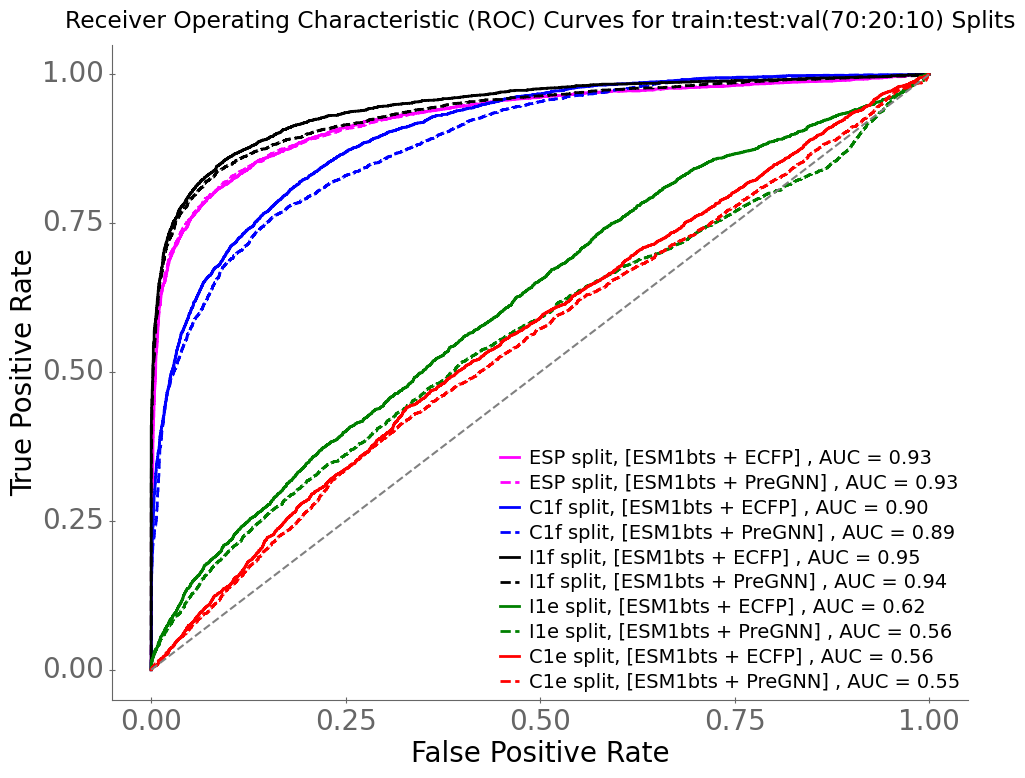

In [32]:
def plot_roc_curve(fpr, tpr, roc_auc, label, linestyle='solid', color='blue'):
    plt.plot(fpr, tpr, color=color, label=f'{label} , AUC = {roc_auc:.2f}', linewidth=2.0, linestyle=linestyle)

fig, ax = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 14}) 

# Define your data and labels here
data = [
    (fpr_esm1b_ts_ecfp_ESP_3S, tpr_esm1b_ts_ecfp_ESP_3S, roc_auc_esm1b_ts_ecfp_ESP_3S, 'ESP split, [ESM1bts + ECFP]', 'solid', 'magenta'),
    (fpr_esm1b_ts_gnn_ESP_3S, tpr_esm1b_ts_gnn_ESP_3S, roc_auc_esm1b_ts_gnn_ESP_3S, 'ESP split, [ESM1bts + PreGNN]', 'dashed', 'magenta'),
    (fpr_esm1b_ts_ecfp_C1f_3S, tpr_esm1b_ts_ecfp_C1f_3S, roc_auc_esm1b_ts_ecfp_C1f_3S, 'C1f split, [ESM1bts + ECFP]', 'solid', 'blue'),
    (fpr_esm1b_ts_gnn_C1f_3S, tpr_esm1b_ts_gnn_C1f_3S, roc_auc_esm1b_ts_gnn_C1f_3S, 'C1f split, [ESM1bts + PreGNN]', 'dashed', 'blue'),
    (fpr_esm1b_ts_ecfp_I1f_3S, tpr_esm1b_ts_ecfp_I1f_3S, roc_auc_esm1b_ts_ecfp_I1f_3S, 'I1f split, [ESM1bts + ECFP]', 'solid', 'black'),
    (fpr_esm1b_ts_gnn_I1f_3S, tpr_esm1b_ts_gnn_I1f_3S, roc_auc_esm1b_ts_gnn_I1f_3S, 'I1f split, [ESM1bts + PreGNN]', 'dashed', 'black'),
    (fpr_esm1b_ts_ecfp_I1e_3S, tpr_esm1b_ts_ecfp_I1e_3S, roc_auc_esm1b_ts_ecfp_I1e_3S, 'I1e split, [ESM1bts + ECFP]', 'solid', 'green'),
    (fpr_esm1b_ts_gnn_I1e_3S, tpr_esm1b_ts_gnn_I1e_3S, roc_auc_esm1b_ts_gnn_I1e_3S, 'I1e split, [ESM1bts + PreGNN]', 'dashed', 'green'),
    (fpr_esm1b_ts_ecfp_C1e_3S, tpr_esm1b_ts_ecfp_C1e_3S, roc_auc_esm1b_ts_ecfp_C1e_3S, 'C1e split, [ESM1bts + ECFP]', 'solid', 'red'),
    (fpr_esm1b_ts_gnn_C1e_3S, tpr_esm1b_ts_gnn_C1e_3S, roc_auc_esm1b_ts_gnn_C1e_3S, 'C1e split, [ESM1bts + PreGNN]', 'dashed', 'red'),
]

# Plot each ROC curve
for fpr, tpr, roc_auc, label, linestyle, color in data:
    plot_roc_curve(fpr, tpr, roc_auc, label, linestyle, color)

# Set axis parameters
ax.locator_params(axis="y", nbins=5)
ax.locator_params(axis="x", nbins=5)

# Set legend
plt.legend(loc='lower right', fontsize=14)
plt.plot([0, 1], [0, 1], '--', color='gray', linewidth=1.5)
plt.xlim([-0.05, 1.05]) 
plt.ylim([-0.05, 1.05]) 
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for train:test:val(70:20:10) Splits')
#plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 

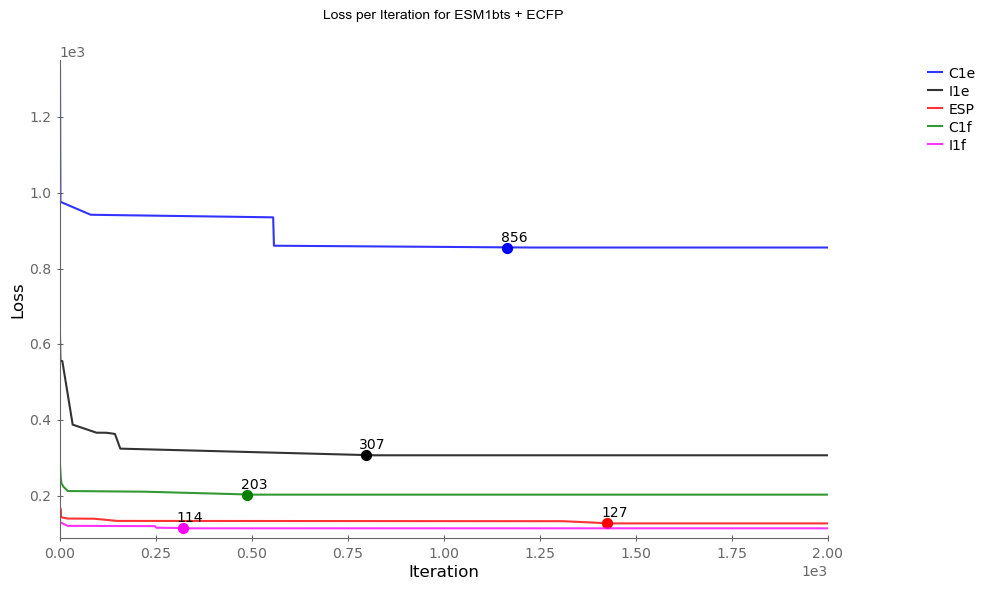

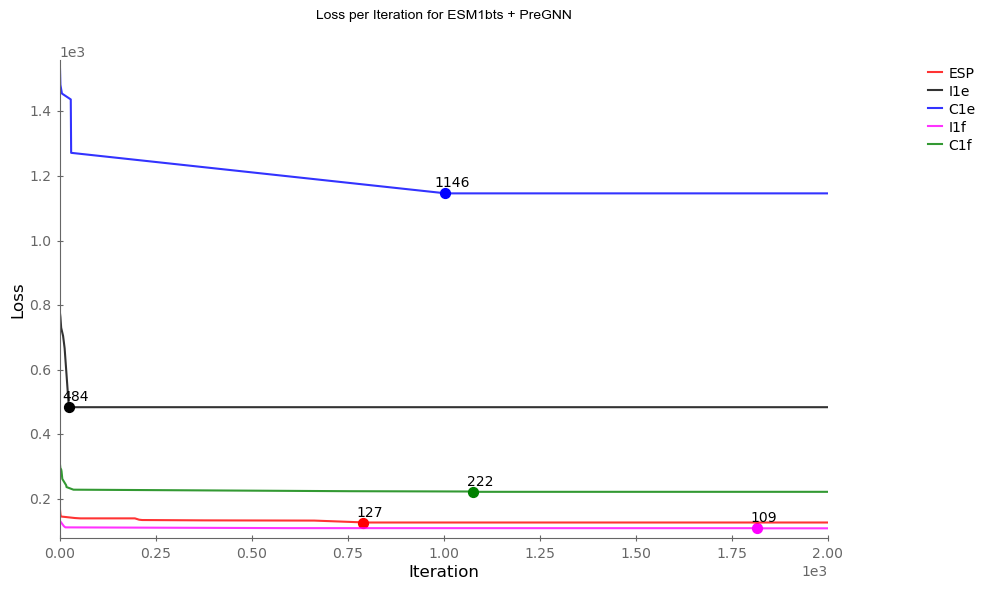

In [7]:
log_directory = '/Users/vahidatabaigi/SIP/ESP_HardSplits/data/Reports/hyperOp_report'
log_files = [f for f in os.listdir(log_directory) if f.endswith('.log')]

color_map = {'ESP': 'red', 'C1e': 'blue', 'C1f': 'green', 'I1e': 'black', 'I1f': 'magenta'}

plotting_loss("ECFP", experiment="1D", log_directory=log_directory, color_map=color_map, split_number=3)
plotting_loss("PreGNN", experiment="1D", log_directory=log_directory, color_map=color_map, split_number=3)

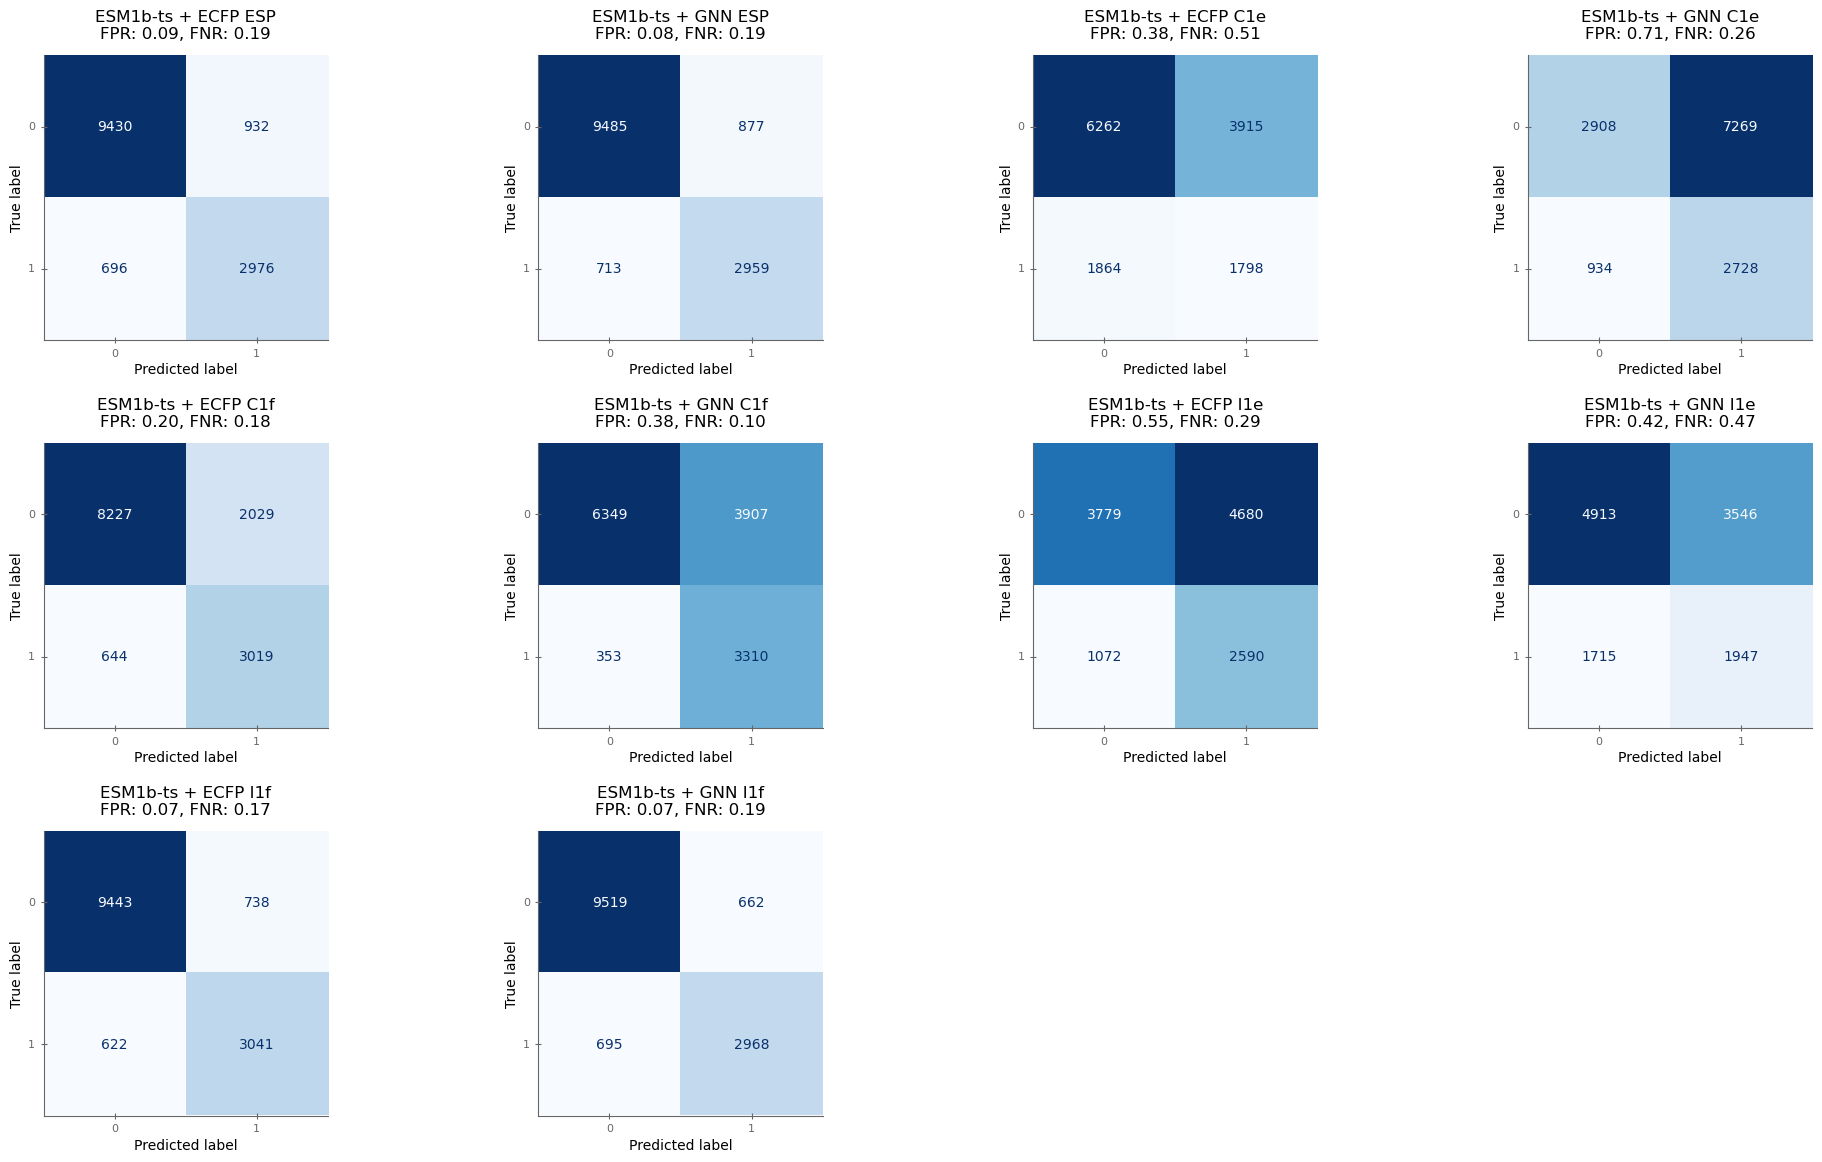

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def calculate_fpr_fnr(y_true, y_pred):
    y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]
    cm = confusion_matrix(y_true, y_pred_binary)
    TN, FP, FN, TP = cm.ravel()
    fpr = FP / (FP + TN)
    fnr = FN / (FN + TP)
    return fpr, fnr, cm
datasets = [
    ('ECFP ESP', test_y_esm1b_ts_ecfp_ESP_3S, y_test_pred_esm1b_ts_ecfp_ESP_3S),
    ('GNN ESP', test_y_esm1b_ts_gnn_ESP_3S, y_test_pred_esm1b_ts_gnn_ESP_3S),
    ('ECFP C1e', test_y_esm1b_ts_ecfp_C1e_3S, y_test_pred_esm1b_ts_ecfp_C1e_3S),
    ('GNN C1e', test_y_esm1b_ts_gnn_C1e_3S, y_test_pred_esm1b_ts_gnn_C1e_3S),
    ('ECFP C1f', test_y_esm1b_ts_ecfp_C1f_3S, y_test_pred_esm1b_ts_ecfp_C1f_3S),
    ('GNN C1f', test_y_esm1b_ts_gnn_C1f_3S, y_test_pred_esm1b_ts_gnn_C1f_3S),
    ('ECFP I1e', test_y_esm1b_ts_ecfp_I1e_3S, y_test_pred_esm1b_ts_ecfp_I1e_3S),
    ('GNN I1e', test_y_esm1b_ts_gnn_I1e_3S, y_test_pred_esm1b_ts_gnn_I1e_3S),
    ('ECFP I1f', test_y_esm1b_ts_ecfp_I1f_3S, y_test_pred_esm1b_ts_ecfp_I1f_3S),
    ('GNN I1f', test_y_esm1b_ts_gnn_I1f_3S, y_test_pred_esm1b_ts_gnn_I1f_3S)
]

n_rows = 4
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 16))
#fig.suptitle('Confusion Matrices for Different Models (3 splits)', fontsize=14)
for i, (name, y_true, y_pred) in enumerate(datasets):
    fpr, fnr, cm = calculate_fpr_fnr(y_true, y_pred)
    row, col = divmod(i, n_cols)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[row, col], cmap='Blues', colorbar=False)
    axes[row, col].set_title(f"ESM1b-ts + {name}\nFPR: {fpr:.2f}, FNR: {fnr:.2f}", fontsize=12)
    for text in axes[row, col].texts:
        text.set_fontsize(10)
    axes[row, col].tick_params(axis='both', which='major', labelsize=8)
    axes[row, col].set_xlabel(axes[row, col].get_xlabel(), fontsize=10)
    axes[row, col].set_ylabel(axes[row, col].get_ylabel(), fontsize=10)
for j in range(len(datasets), n_rows * n_cols):
    fig.delaxes(axes.flat[j])
plt.subplots_adjust(hspace=0.9, wspace=0.1)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('CM3S.png', dpi=600, bbox_inches='tight')
plt.show()

# C1e vs C2

### ROC-AUC score for C1 splits vs C2 split

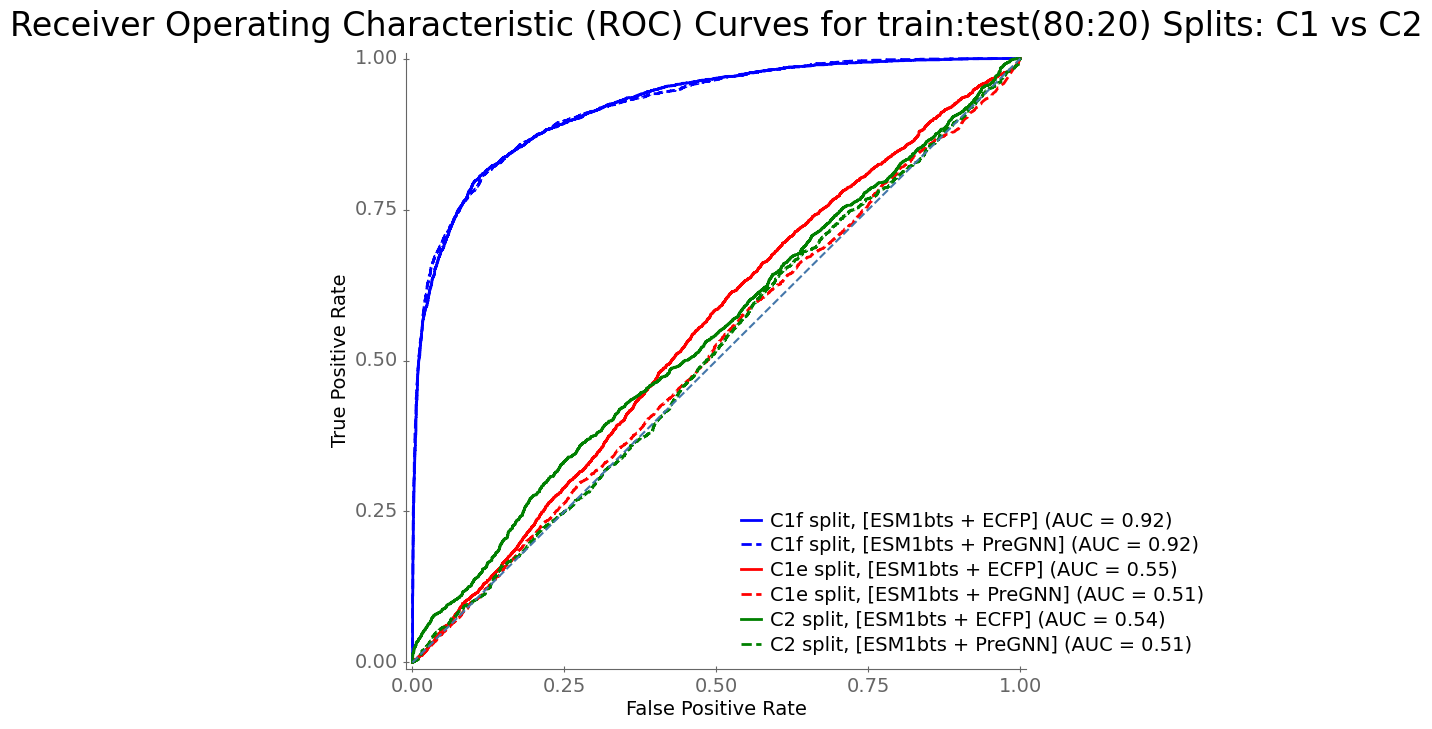

In [35]:
def plot_roc_curve(fpr, tpr, roc_auc, label, linestyle='solid', color='blue'):
    plt.plot(fpr, tpr, color=color, label=f'{label} (AUC = {roc_auc:.2f})', linewidth=2.0, linestyle=linestyle)

fig, ax = plt.subplots(figsize=(8, 8))
plt.rcParams.update({'font.size': 20})

# Define your data and labels here
data = [
    
    (fpr_esm1b_ts_ecfp_C1f_2S, tpr_esm1b_ts_ecfp_C1f_2S, roc_auc_esm1b_ts_ecfp_C1f_2S, 'C1f split, [ESM1bts + ECFP]', 'solid', 'blue'),
    (fpr_esm1b_ts_gnn_C1f_2S, tpr_esm1b_ts_gnn_C1f_2S, roc_auc_esm1b_ts_gnn_C1f_2S, 'C1f split, [ESM1bts + PreGNN]', 'dashed', 'blue'),

    (fpr_esm1b_ts_ecfp_C1e_2S, tpr_esm1b_ts_ecfp_C1e_2S, roc_auc_esm1b_ts_ecfp_C1e_2S, 'C1e split, [ESM1bts + ECFP]', 'solid', 'red'),
    (fpr_esm1b_ts_gnn_C1e_2S, tpr_esm1b_ts_gnn_C1e_2S, roc_auc_esm1b_ts_gnn_C1e_2S, 'C1e split, [ESM1bts + PreGNN]', 'dashed', 'red'),
    
    (fpr_esm1b_ts_ecfp_C2_2S, tpr_esm1b_ts_ecfp_C2_2S, roc_auc_esm1b_ts_ecfp_C2_2S, 'C2 split, [ESM1bts + ECFP]', 'solid','green'),
    (fpr_esm1b_ts_gnn_C2_2S, tpr_esm1b_ts_gnn_C2_2S, roc_auc_esm1b_ts_gnn_C2_2S,'C2 split, [ESM1bts + PreGNN]', 'dashed','green'),

]
# Plot each ROC curve
for fpr, tpr, roc_auc, label, linestyle, color in data:
    plot_roc_curve(fpr, tpr, roc_auc, label, linestyle, color)

# Set axis parameters
ax.locator_params(axis="y", nbins=5)
ax.locator_params(axis="x", nbins=5)

# Set legend
plt.legend(loc='lower right', bbox_to_anchor=(1.30, 0.01), fontsize=14)
plt.plot([0, 1], [0, 1], '--')
eps = 0.01
plt.xlim([0 - eps, 1 + eps])
plt.ylim([0 - eps, 1 + eps])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for train:test(80:20) Splits: C1 vs C2')
plt.show()


# Similarity-based leakage calculation

### two-split

In [2]:
df_results = pd.read_csv(join("..", "data", "2splits", "similarity_leakage_results.csv"))
df_results

,train_test_smiles_leakage,train_val_smiles_leakage,test_val_smiles_leakage,train_test_protein_leakage,train_val_protein_leakage,test_val_protein_leakage,Split method,Fold_number
0,4.49,13.16,1.49,5.75,10.84,1.59,C1e,0
1,4.78,14.04,1.20,5.83,10.33,1.41,C1e,1
2,4.89,12.28,1.09,6.02,9.91,1.30,C1e,2
3,4.58,16.52,1.40,5.74,12.04,1.55,C1e,3
4,5.18,7.38,0.80,6.63,7.05,0.66,C1e,4
5,9.28,12.38,2.97,6.28,11.45,1.80,I1e,0
6,9.86,10.87,2.39,6.66,10.21,1.40,I1e,1
7,8.88,14.23,3.37,6.40,12.32,1.67,I1e,2
8,10.39,9.18,1.86,6.83,8.79,1.24,I1e,3
9,10.58,7.69,1.67,7.09,7.59,0.97,I1e,4


In [3]:
df_avg_results = df_results.groupby('Split method').mean().reset_index().drop(columns=["Fold_number"])
AUC = {"ESPC2":0.94,"ESP": 0.96, "I1f": 0.96, "I1e": 0.70, "C1f": 0.92, "C1e": 0.55, "C2":0.54}
df_avg_results['AUC'] = df_avg_results['Split method'].map(AUC)
#df_results.to_csv("leakage_results.csv", index=False)
df_avg_results

,Split method,train_test_smiles_leakage,train_val_smiles_leakage,test_val_smiles_leakage,train_test_protein_leakage,train_val_protein_leakage,test_val_protein_leakage,AUC
0,C1e,4.784,12.676,1.196,5.994,10.034,1.302,0.55
1,C1f,12.958,10.146,3.240,2.162,6.968,0.538,0.92
2,C2,4.036,12.880,1.008,1.132,11.406,0.260,0.54
3,ESP,13.096,10.078,3.274,5.204,6.210,1.296,0.96
4,ESPC2,12.722,10.278,3.178,5.518,6.736,1.372,0.94
5,I1e,9.798,10.870,2.452,6.652,10.072,1.416,0.70
6,I1f,12.984,10.136,3.246,5.794,6.322,1.442,0.96


In [4]:
numeric_columns = df_avg_results.select_dtypes(include=['float64', 'int64'])
correlation_with_auc = numeric_columns.corr()['AUC']
correlation_with_auc

train_test_smiles_leakage     0.978885
train_val_smiles_leakage     -0.961114
test_val_smiles_leakage       0.978636
train_test_protein_leakage    0.192617
train_val_protein_leakage    -0.970719
test_val_protein_leakage      0.344363
AUC                           1.000000
Name: AUC, dtype: float64

### Three-split

In [21]:
df_results = pd.read_csv(join("..", "data", "3splits", "Similarity_leakage_results_3S.csv"))
AUC = {"ESP": 0.93, "I1f": 0.95, "I1e": 0.62, "C1f": 0.90, "C1e": 0.56}
df_results['AUC'] = df_results['Split method'].map(AUC)
df_results

,train_test_smiles_leakage,train_val_smiles_leakage,test_val_smiles_leakage,train_test_protein_leakage,train_val_protein_leakage,test_val_protein_leakage,Split method,AUC
0,6.78,3.09,0.91,5.92,3.05,0.63,C1e,0.56
1,12.46,6.40,1.47,4.69,3.69,0.83,I1e,0.62
2,13.88,7.19,2.05,2.33,1.18,0.36,C1f,0.90
3,14.19,7.04,2.08,7.00,2.77,1.49,I1f,0.95
4,14.19,7.09,2.10,5.26,2.76,0.78,ESP,0.93


In [22]:
numeric_columns = df_results.select_dtypes(include=['float64', 'int64'])
correlation_with_auc = numeric_columns.corr()['AUC']
correlation_with_auc

train_test_smiles_leakage     0.839390
train_val_smiles_leakage      0.806328
test_val_smiles_leakage       0.960348
train_test_protein_leakage   -0.074370
train_val_protein_leakage    -0.574533
test_val_protein_leakage      0.298490
AUC                           1.000000
Name: AUC, dtype: float64

In [23]:


# Convert the correlation series to a DataFrame, transpose it, and name the row 'Correlation with AUC'
correlation_row = pd.DataFrame(correlation_with_auc).T
correlation_row.index = ['p']

# Append the new row to the original DataFrame
df_results = pd.concat([df_results, correlation_row], ignore_index=False)
df_results.round(2)

,train_test_smiles_leakage,train_val_smiles_leakage,test_val_smiles_leakage,train_test_protein_leakage,train_val_protein_leakage,test_val_protein_leakage,Split method,AUC
0,6.78,3.09,0.91,5.92,3.05,0.63,C1e,0.56
1,12.46,6.40,1.47,4.69,3.69,0.83,I1e,0.62
2,13.88,7.19,2.05,2.33,1.18,0.36,C1f,0.90
3,14.19,7.04,2.08,7.00,2.77,1.49,I1f,0.95
4,14.19,7.09,2.10,5.26,2.76,0.78,ESP,0.93
p,0.84,0.81,0.96,-0.07,-0.57,0.30,NaN,1.00
